# <span style="color:red">IMPORTACION DE LIBRERIAS</span>

In [26]:
# Librerías de manejo de datos
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import OneHotEncoder

# Librerías estadísticas y modelos
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Librerías de visualización de datos
from tabulate import tabulate
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from bokeh.plotting import figure, show
from bokeh.models import PanTool, WheelZoomTool 
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.transform import linear_cmap
from bokeh.palettes import Viridis256

# Otras librerías
import subprocess
import sys

# <span style="color:red;">LECTURA DE DATASET</span>

In [27]:
 # Construye la ruta relativa al archivo 
ruta_relativa= "../primer_proyecto_datos/madrid_airbnb.csv"

# Lee el archivo CSV
df_madrid = pd.read_csv(ruta_relativa)

In [28]:
# Mostrar las primeras filas del dataset para tener una idea de su estructura
df_madrid.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,78,2020-09-20,0.58,1,180
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,33,2018-07-15,0.42,2,364
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,0,NaN,NaN,7,1
3,24805,Gran Via Studio Madrid,346366726,A,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,10,2020-03-01,0.13,1,72
4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,149,2020-03-12,1.12,1,365


### <span style="color:green">-- DESCRIPCION DE COLUMNAS</span>

1. **id:** Identificador único del listado.

2. **name:** Nombre del listado.

3. **host_id:** Identificador único del anfitrión.

4. **host_name:** Nombre del anfitrión.

5. **neighbourhood_group:** Grupo de barrios (podría ser un distrito o una agrupación mayor).

6. **neighbourhood:** Barrio específico.

7. **latitude y longitude:** Coordenadas del listado.

8. **room_type:** Tipo de habitación (e.g., habitación privada, casa/apartamento completo).

9. **price:** Precio por noche.

10. **minimum_nights:** Mínimo de noches para reservar.

11. **number_of_reviews:** Número total de reseñas.

12. **last_review:** Fecha de la última reseña.

13. **reviews_per_month:** Promedio de reseñas por mes.

14. **calculated_host_listings_count:** Cantidad de listados del mismo anfitrión.

15. **14availability_365:** Días disponibles para reserva en el año.

# <span style="color:red;">EXPLORACION BASICA DEL DATASET</span>

1. Verificación de valores faltantes.

2. Resumen estadístico de las columnas numéricas.

3. Distribución de algunas columnas clave (por ejemplo, tipo de habitación, distrito, precio).

Comencemos verificando los valores faltantes.

In [29]:
# Verificación de valores faltantes en cada columna
missing_values = df_madrid.isnull().sum()

missing_values

id                                   0
name                                 3
host_id                              0
host_name                          527
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5637
reviews_per_month                 5637
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<span style="color:green">Los datos faltantes en el dataset son:</span>

- name: 3 valores faltantes.
- host_name: 527 valores faltantes.
- last_review: 5637 valores faltantes.
- reviews_per_month: 5637 valores faltantes.

Podemos observar que el número de valores faltantes en "last_review" y "reviews_per_month" es el mismo. Esto podría sugerir que los alojamientos que no tienen una "last_review" tampoco tienen un registro de "reviews_per_month".

Ahora realizaremos el resumen estadistico del dataset

In [30]:
# Resumen estadístico de las columnas numéricas
statistical_summary = df_madrid.describe()

statistical_summary

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.961800e+04,1.961800e+04,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,13981.000000,19618.000000,19618.000000
mean,2.912200e+07,1.312165e+08,40.420984,-3.694040,129.271740,6.586196,31.858803,1.125958,10.229177,159.098328
std,1.351839e+07,1.166790e+08,0.022627,0.028671,484.143545,33.286582,63.938997,1.348235,23.546472,144.252803
min,6.369000e+03,7.952000e+03,40.332210,-3.863910,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.903424e+07,2.765313e+07,40.409393,-3.707700,35.000000,1.000000,0.000000,0.170000,1.000000,0.000000
50%,3.187506e+07,9.901898e+07,40.419735,-3.701120,58.000000,2.000000,4.000000,0.590000,2.000000,126.000000
75%,4.090994e+07,2.256898e+08,40.430290,-3.685420,100.000000,3.000000,31.000000,1.630000,6.000000,320.000000
max,4.918779e+07,3.964281e+08,40.562740,-3.531900,9999.000000,1125.000000,706.000000,16.220000,163.000000,365.000000


### <span style="color:green">-- RESUMEN ESTADISTICO:</span>

1. **id y host_id:** Son simplemente identificadores, por lo que no es relevante analizar su distribución.

2. **latitude y longitude:** Las coordenadas de los alojamientos tienen una variabilidad relativamente baja, lo que indica que están bastante centradas en Madrid.

3. **price:** El precio promedio por noche es de aproximadamente 129 euros, pero tiene una gran desviación estándar (484 euros). Esto sugiere que hay algunos alojamientos con precios extremadamente altos. El 75% de los alojamientos tienen un precio de 100 euros o menos por noche, pero el precio máximo es de 9999 euros.

4. **minimum_nights:** Aunque la media es de 6.6 noches, el 75% de los alojamientos requieren 3 noches o menos como mínimo. Sin embargo, hay alojamientos que requieren hasta 1125 noches como mínimo.

5. **number_of_reviews:** La media es de 31.9 reseñas por alojamiento. El 50% de los alojamientos tienen 4 reseñas o menos.

6. **reviews_per_month:** El promedio es de 1.13 reseñas por mes, con una desviación estándar de 1.35. El 75% de los alojamientos tienen 1.63 reseñas o menos por mes.

7. **calculated_host_listings_count:** En promedio, un anfitrión tiene 10.2 alojamientos. Sin embargo, el 75% de los anfitriones tienen 6 alojamientos o menos.

8. **availability_365:** En promedio, los alojamientos están disponibles 159 días al año. El 50% de los alojamientos están disponibles 126 días o menos al año.


### <span style="color:green">-- VISUALIZACION DE COLUMNAS CLAVE:</span>

**columnas clave:** room_type, neighbourhood_group, y price.

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

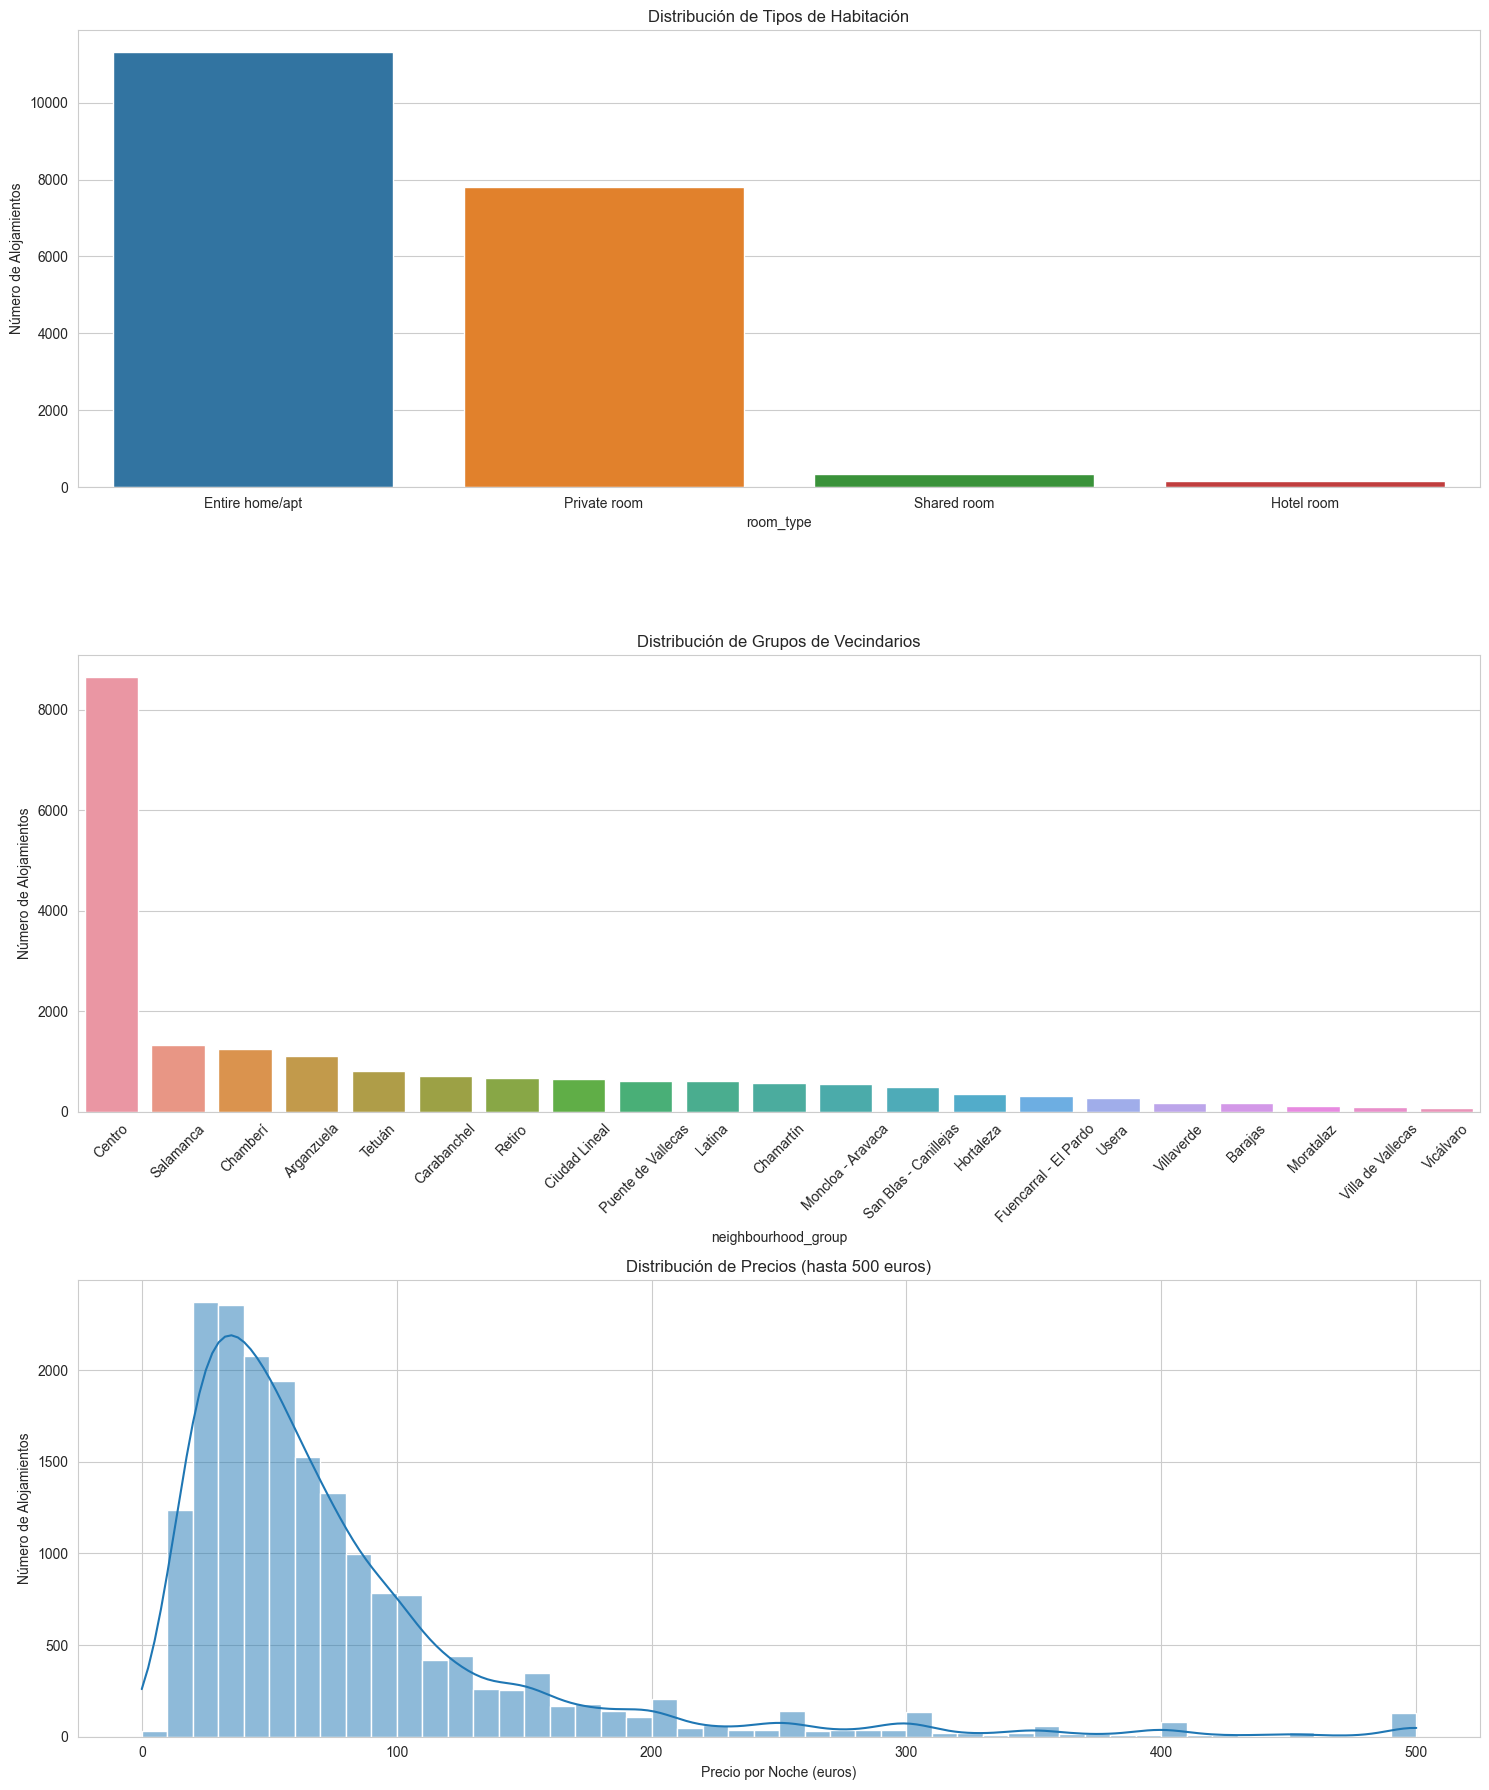

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer el estilo visual
sns.set_style("whitegrid")

# Crear una figura con subplots
fig, ax = plt.subplots(3, 1, figsize=(15, 18))

# Gráfico de distribución para room_type
sns.countplot(data=df_madrid, x="room_type", ax=ax[0], order=df_madrid['room_type'].value_counts().index)
ax[0].set_title("Distribución de Tipos de Habitación")
ax[0].set_ylabel("Número de Alojamientos")

# Gráfico de distribución para neighbourhood_group
sns.countplot(data=df_madrid, x="neighbourhood_group", ax=ax[1], order=df_madrid['neighbourhood_group'].value_counts().index)
ax[1].set_title("Distribución de Grupos de Vecindarios")
ax[1].set_ylabel("Número de Alojamientos")
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=45)

# Gráfico de distribución para price (limitando a 500 euros para una mejor visualización)
sns.histplot(df_madrid[df_madrid["price"] <= 500]["price"], bins=50, ax=ax[2], kde=True)
ax[2].set_title("Distribución de Precios (hasta 500 euros)")
ax[2].set_xlabel("Precio por Noche (euros)")
ax[2].set_ylabel("Número de Alojamientos")

# Ajustar el layout
plt.tight_layout()
plt.show()

<span style="color:green">OBSERVACION:</span>

- **Distribución de tipos de habitación:** La mayoría de los alojamientos en Madrid son del tipo "Entire home/apt", seguido por "Private room". Hay una cantidad significativamente menor de "Shared room" y "Hotel room".

- **Distribución de grupos de vecindarios:** El distrito "Centro" tiene, con diferencia, la mayor cantidad de alojamientos, seguido por "Salamanca", "Chamberí" y "Arganzuela". Los distritos "Vicálvaro" y "Barajas" tienen la menor cantidad de alojamientos en Airbnb.

- **Distribución de precios:** La mayoría de los precios están concentrados en el rango inferior, con un pico alrededor de los 20-40 euros. Sin embargo, hay alojamientos que alcanzan los 500 euros por noche.


# <span style="color:red;">TRANSFORMACION DE COLUMNAS E IMPUTACIÓN DE DATOS</span>

1. Para la columna **name**, podríamos reemplazar los valores faltantes con una cadena genérica como "Unnamed".

2. Para **host_name**, podríamos hacer algo similar y reemplazar los valores faltantes con "Unknown Host".

3. Las columnas **last_review y reviews_per_month** están relacionadas con las reseñas. Si un alojamiento no tiene reseñas, tiene sentido que estos valores estén ausentes. 

Podemos reemplazar "last_review" con una fecha muy antigua (por ejemplo, "1900-01-01") para indicar que nunca ha sido revisado, y "reviews_per_month" con 0. se trata de un valor sustituto para los alojamientos sin reseñas.

Además se convertirá a formato fecha.

4. Añadiremos una nueva columna llamada has_review, que será un indicador booleano que señalará si un alojamiento tiene reseña (1) o no (0).

In [32]:
# Imputación de datos faltantes

# Reemplazar valores faltantes en 'name' y 'host_name'
df_madrid['name'].fillna('Unnamed', inplace=True)
df_madrid['host_name'].fillna('Unknown Host', inplace=True)

# Reemplazar valores faltantes en 'last_review' y 'reviews_per_month'
df_madrid['last_review'].fillna('1900-01-01', inplace=True)
df_madrid['reviews_per_month'].fillna(0, inplace=True)

# Verificar nuevamente los valores faltantes
missing_values_after_imputation = df_madrid.isnull().sum()

missing_values_after_imputation

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [33]:
# Convertir 'last_review' a formato fecha
df_madrid['last_review'] = pd.to_datetime(df_madrid['last_review'])

# Añadir columna 'has_review'
df_madrid['has_review'] = (df_madrid['number_of_reviews'] > 0).astype(int)

# Mostrar las primeras filas del dataset para verificar los cambios
df_madrid.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,has_review
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,78,2020-09-20,0.58,1,180,1
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,33,2018-07-15,0.42,2,364,1
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,0,1900-01-01,0.00,7,1,0
3,24805,Gran Via Studio Madrid,346366726,A,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,10,2020-03-01,0.13,1,72,1
4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,149,2020-03-12,1.12,1,365,1


- La columna last_review se ha convertido al formato de fecha.

- Se ha añadido la columna has_review que indica si un alojamiento tiene una reseña (1) o no (0).

# <span style="color:red;">ANALISIS EXPLORATORIO EDA</span>


1. **Distribución de precios:**

- Histograma de precios para visualizar la distribución.
- Boxplots para identificar outliers.
- Precio medio por tipo de habitación.
- Precio medio por distrito o vecindario.

2. **Distribución de disponibilidad:**

- Cuántos alojamientos están disponibles más de 200, 250, 300 días al año.
- Disponibilidad promedio por tipo de habitación y por distrito.

3. **Relación entre variables:**

- ¿Cómo varía el número de reseñas con el precio? ¿Los lugares más caros tienen más/menos reseñas?
- ¿La disponibilidad afecta el número de reseñas?

4. **Análisis de anfitriones:**

- Top 10 anfitriones con más alojamientos.
- Distribución del número de alojamientos por anfitrión.

5. **Análisis geoespacial:**

- Mapa de Madrid mostrando la ubicación de los alojamientos, posiblemente codificado por color basado en precio o disponibilidad.

6. **Análisis de reseñas:**

- ¿Cómo ha cambiado el número de reseñas a lo largo del tiempo?
- Distribución de reviews_per_month por tipo de habitación y distrito.

7. **Palabras clave en los nombres de los alojamientos:**

- Podemos analizar las palabras más comunes en los nombres de los alojamientos para ver qué características o palabras resaltan más los anfitriones (por ejemplo, "vista", "céntrico", "moderno", etc.).


## <span style="color:green">1. Distribución de precios</span>


**a. Histograma de precios**

Visualizaremos la distribución de precios con un histograma. Limitaremos el rango de precios para tener una mejor visualización, excluyendo algunos de los valores extremadamente altos.

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



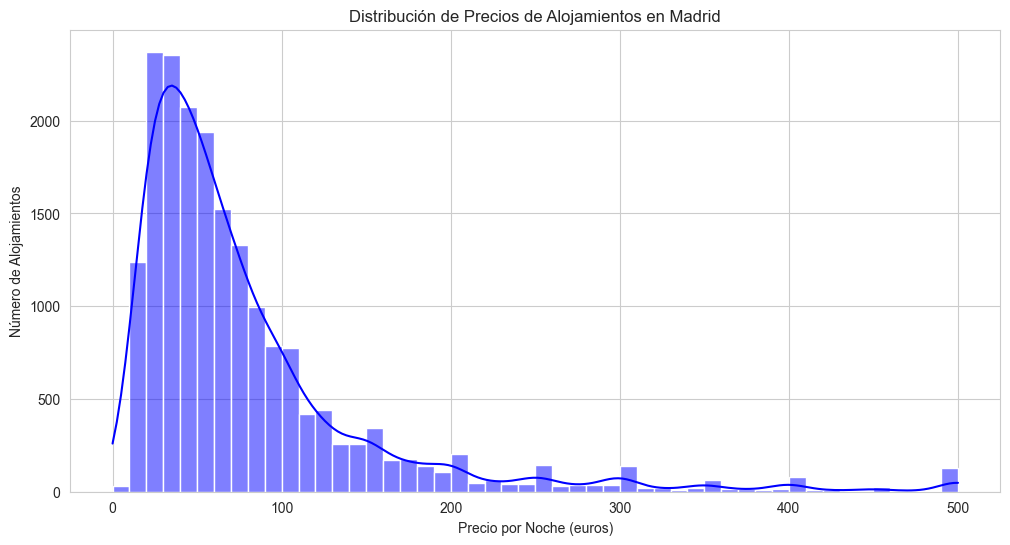

In [35]:
# Histograma de precios (limitando a 500 euros para una mejor visualización)
plt.figure(figsize=(12, 6))
sns.histplot(df_madrid[df_madrid["price"] <= 500]["price"], bins=50, kde=True, color="blue")
plt.title("Distribución de Precios de Alojamientos en Madrid")
plt.xlabel("Precio por Noche (euros)")
plt.ylabel("Número de Alojamientos")
plt.show()

<span style="color:green">Análisis del histograma de precios:</span>

- La mayoría de los precios están concentrados en el rango de 0 a 100 euros, con un pico evidente alrededor de los 20-40 euros.

- La distribución tiene una cola hacia la derecha, lo que indica la presencia de algunos alojamientos con precios más altos, pero son menos frecuentes

**b. Boxplots para identificar outliers**

Vamos a usar un boxplot para identificar los valores atípicos en la distribución de precios.


/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



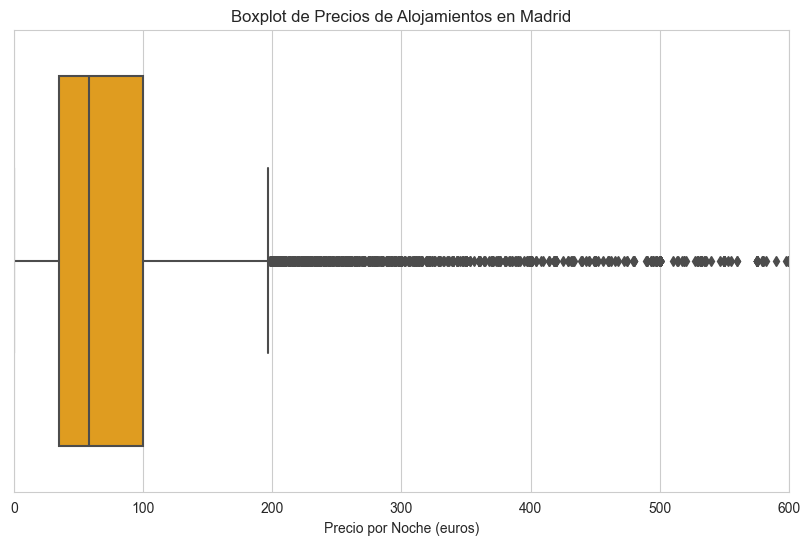

In [36]:
# Boxplot de precios
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_madrid["price"], color="orange")
plt.title("Boxplot de Precios de Alojamientos en Madrid")
plt.xlabel("Precio por Noche (euros)")
plt.xlim(0, 600)  # Limitamos el eje x para una mejor visualización
plt.show()

<span style="color:green">Análisis del boxplot de precios:</span>

- La mediana del precio se encuentra alrededor de los 60 euros, lo que indica que al menos el 50% de los alojamientos tienen un precio de 60 euros o menos por noche.

- El rango intercuartil (IQR), representado por la caja, se extiende aproximadamente desde los 30 euros hasta poco más de 100 euros. Esto significa que el 50% central de los datos (del 25% al 75%) tiene precios en este rango.

- Hay una concentración significativa de outliers en el rango de 200-600 euros, lo que indica que hay una buena cantidad de alojamientos en Madrid con precios más altos que el promedio.

- Hay varios valores atípicos en el extremo superior, con algunos alojamientos que tienen precios significativamente más altos que la mayoría. Estos pueden ser alojamientos de lujo o con características especiales.

**c. Precio medio por tipo de habitación**

Ahora, vamos a visualizar el precio medio según el tipo de habitación.

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



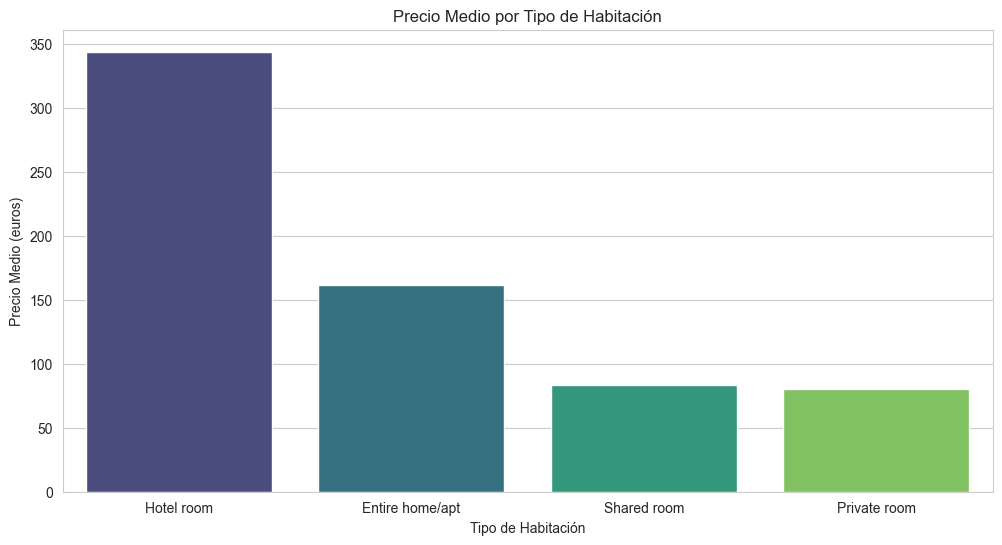

In [37]:
# Precio medio por tipo de habitación
avg_price_by_room = df_madrid.groupby("room_type")["price"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_room.index, y=avg_price_by_room.values, palette="viridis")
plt.title("Precio Medio por Tipo de Habitación")
plt.xlabel("Tipo de Habitación")
plt.ylabel("Precio Medio (euros)")
plt.show()

<span style="color:green">Análisis del precio medio por tipo de habitación:</span>

- Los alojamientos del tipo "Hotel room" tienen el precio medio más alto. Esto se debe a que ofrecen más espacio, privacidad y, a menudo, más comodidades en comparación con otros tipos de habitaciones.

- Las "entire home/apt" tienen un precio medio significativamente más bajo en comparación.

- Las "Shared rooms" (habitaciones compartidas) y "private rooms" (habitaciones privadas) tienen precios medios aún más bajos, lo que tiene sentido ya que suelen ofrecer menos privacidad y comodidades.

**d. Precio medio por distrito o vecindario**

A continuación, analizaremos el precio medio por distrito o grupo de vecindarios.

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



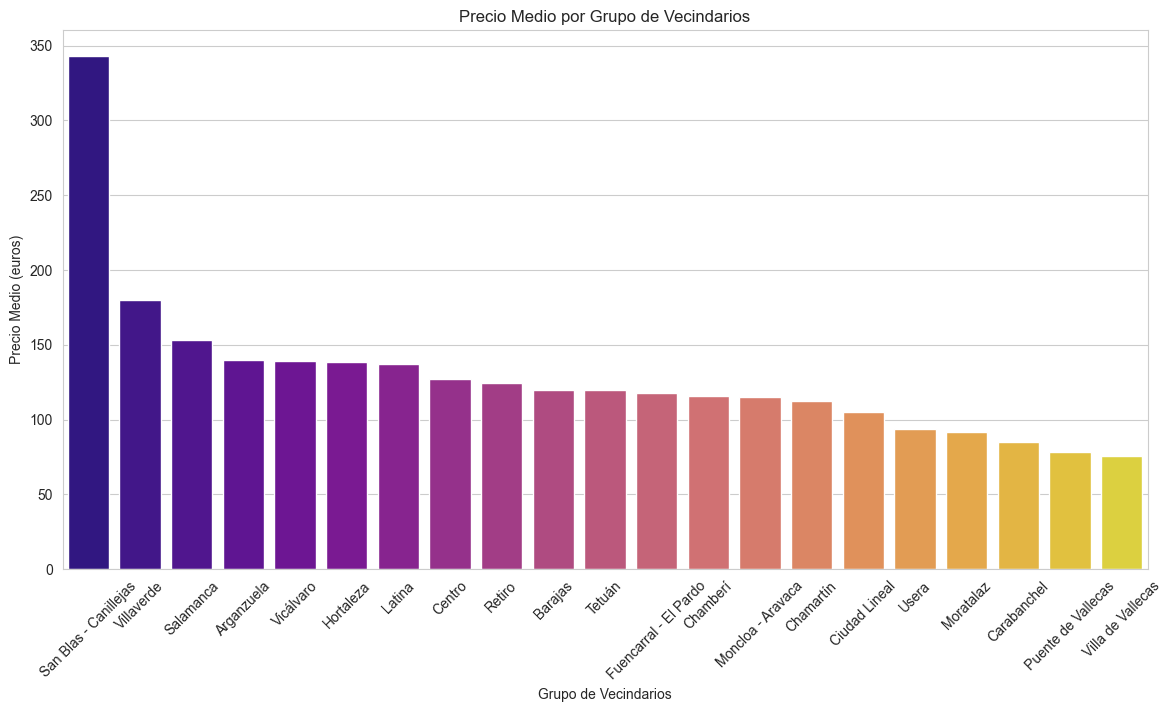

In [38]:
# Precio medio por grupo de vecindarios
avg_price_by_neighbourhood_group = df_madrid.groupby("neighbourhood_group")["price"].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x=avg_price_by_neighbourhood_group.index, y=avg_price_by_neighbourhood_group.values, palette="plasma")
plt.title("Precio Medio por Grupo de Vecindarios")
plt.xlabel("Grupo de Vecindarios")
plt.ylabel("Precio Medio (euros)")
plt.xticks(rotation=45)
plt.show()

<span style="color:green">Análisis del precio medio por grupo de vecindarios:</span>

- "Salamanca" tiene el precio medio más alto entre todos los distritos. Este distrito es conocido por ser una de las zonas más exclusivas y lujosas de Madrid.

- "Centro" le sigue de cerca, lo cual tiene sentido ya que es el corazón turístico y comercial de Madrid.

- "Chamartín" y "Chamberí" también tienen precios medios elevados.

- Distritos como "Villaverde", "Usera" y "Puente de Vallecas", "Villa de Vallecas" tienen los precios medios más bajos, lo que puede indicar que son zonas más residenciales y menos turísticas.

## <span style="color:green">2. Distribución de disponibilidad</span>

**a. Alojamientos disponibles más de 200, 250, 300 días al año**

Vamos a visualizar cuántos alojamientos están disponibles más de 200, 250 y 300 días al año.

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



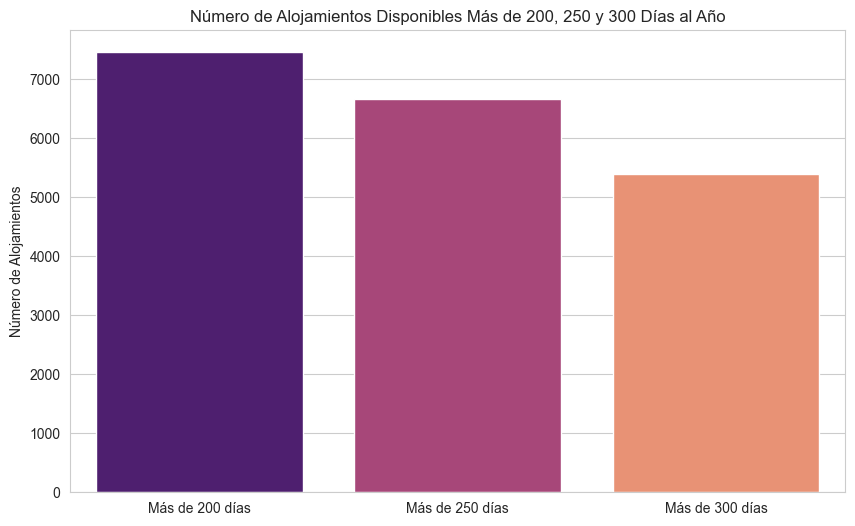

In [39]:
# Alojamientos disponibles más de 200, 250 y 300 días al año
availability_counts = [
    (df_madrid["availability_365"] > 200).sum(),
    (df_madrid["availability_365"] > 250).sum(),
    (df_madrid["availability_365"] > 300).sum()
]
availability_labels = ["Más de 200 días", "Más de 250 días", "Más de 300 días"]

plt.figure(figsize=(10, 6))
sns.barplot(x=availability_labels, y=availability_counts, palette="magma")
plt.title("Número de Alojamientos Disponibles Más de 200, 250 y 300 Días al Año")
plt.ylabel("Número de Alojamientos")
plt.show()


<span style="color:green">Análisis de la Disponibilidad de Alojamientos:</span>

- Hay más de 6,000 alojamientos en Madrid que están disponibles más de 200 días al año. Esto indica que una buena proporción de alojamientos está disponible para ser alquilada durante la mayor parte del año.

- A medida que aumentamos el umbral de disponibilidad a 250 y 300 días, el número de alojamientos disminuye. Esto es esperado, ya que menos alojamientos estarán disponibles durante períodos de tiempo tan prolongados.

- Aproximadamente 3,500 alojamientos están disponibles más de 250 días al año, y alrededor de 2,500 están disponibles más de 300 días al año.


**b. Disponibilidad promedio por tipo de habitación y por distrito**

Procederemos a visualizar la disponibilidad promedio por tipo de habitación y luego por distrito.

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/karlalamus/Data_Analyst/data.anal

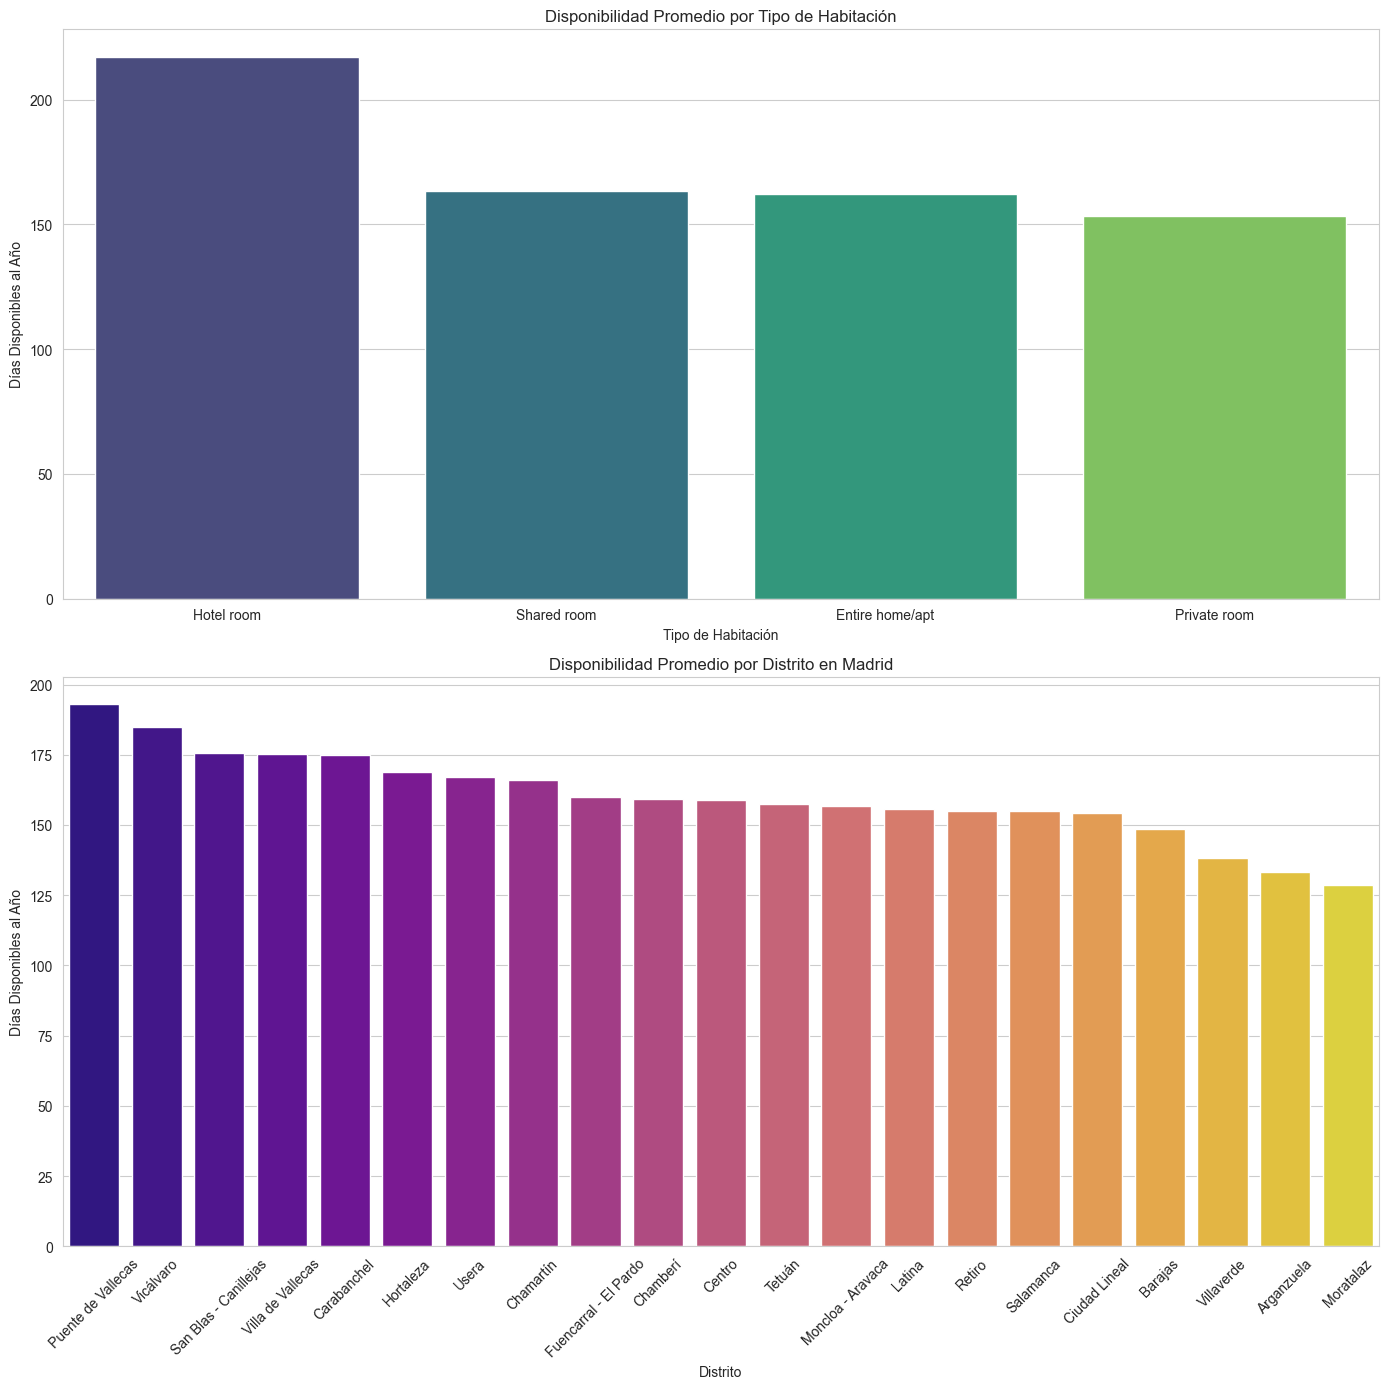

In [43]:
# Disponibilidad promedio por tipo de habitación
avg_availability_by_room_type = df_madrid.groupby("room_type")["availability_365"].mean().sort_values(ascending=False)

# Disponibilidad promedio por distrito
avg_availability_by_district = df_madrid.groupby("neighbourhood_group")["availability_365"].mean().sort_values(ascending=False)

# Visualizar los resultados
fig, ax = plt.subplots(2, 1, figsize=(14, 14))

# Disponibilidad por tipo de habitación
sns.barplot(x=avg_availability_by_room_type.index, y=avg_availability_by_room_type.values, palette="viridis", ax=ax[0])
ax[0].set_title("Disponibilidad Promedio por Tipo de Habitación")
ax[0].set_xlabel("Tipo de Habitación")
ax[0].set_ylabel("Días Disponibles al Año")

# Disponibilidad por distrito
sns.barplot(x=avg_availability_by_district.index, y=avg_availability_by_district.values, palette="plasma", ax=ax[1])
ax[1].set_title("Disponibilidad Promedio por Distrito en Madrid")
ax[1].set_xlabel("Distrito")
ax[1].set_ylabel("Días Disponibles al Año")
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<span style="color:green">Análisis de la Disponibilidad Promedio:</span>

- Las "Hotel rooms" (habitaciones de hotel) tienen, con diferencia, la disponibilidad promedio más alta durante el año. Esto tiene sentido, ya que los hoteles suelen estar disponibles para reservas la mayoría de los días del año.

- Las "Shared rooms" (habitaciones compartidas) y "Entire home/apt" (casa o apartamento completo) tienen una disponibilidad promedio similar, que es menor que la de las habitaciones de hotel pero aún relativamente alta.

- Las "Private rooms" (habitaciones privadas) tienen la disponibilidad promedio más baja, lo que indica que los anfitriones podrían estar alquilando estas habitaciones solo ocasionalmente o en ciertas temporadas del año.

**- Por Distrito:**

1. "Barajas", conocido por ser el distrito donde se encuentra el principal aeropuerto de Madrid, tiene la mayor disponibilidad promedio. Esto podría deberse a que hay muchos alojamientos destinados a viajeros en tránsito o a aquellos que desean estar cerca del aeropuerto.

2. Los distritos "Centro", "Salamanca" y "Chamberí" tienen una disponibilidad promedio menor en comparación con otros distritos. Estas áreas son populares y tienen una alta demanda, lo que podría explicar su menor disponibilidad.

3. "Vicálvaro" y "Moratalaz" tienen una alta disponibilidad promedio, posiblemente porque son áreas más residenciales y menos turísticas.


## <span style="color:green">3. RELACIÓN ENTRE VARIABLES</span>

**a. ¿Cómo varía el número de reseñas con el precio? ¿Los lugares más caros tienen más/menos reseñas?**

Para abordar esta pregunta, vamos a visualizar la relación entre el precio y el número de reseñas utilizando un gráfico de dispersión (scatter plot). También calcularé el coeficiente de correlación de Pearson para obtener una medida cuantitativa de la relación.

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



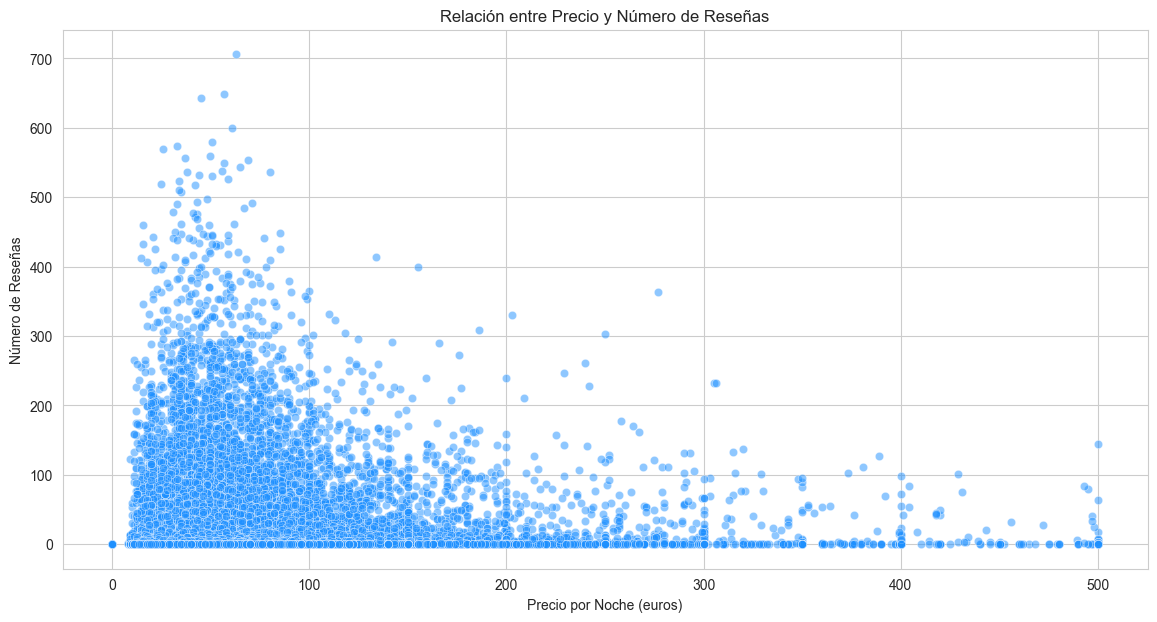

-7.810991415696319e-06

In [44]:
# Gráfico de dispersión entre precio y número de reseñas
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_madrid[df_madrid["price"] <= 500], x="price", y="number_of_reviews", alpha=0.5, color='dodgerblue')
plt.title("Relación entre Precio y Número de Reseñas")
plt.xlabel("Precio por Noche (euros)")
plt.ylabel("Número de Reseñas")
plt.show()

# Coeficiente de correlación de Pearson entre precio y número de reseñas
correlation_price_reviews = df_madrid["price"].corr(df_madrid["number_of_reviews"])
correlation_price_reviews

<span style="color:green">Análisis de la Relación entre Precio y Número de Reseñas:</span>

- El gráfico de dispersión muestra una distribución bastante dispersa entre el precio y el número de reseñas. No parece haber una tendencia clara que indique que los alojamientos más caros tengan más o menos reseñas que los alojamientos más baratos.

- El coeficiente de correlación de Pearson entre el precio y el número de reseñas es prácticamente cero (−7.81×10−6−7.81×10 −6), lo que indica que no hay una correlación lineal significativa entre estas dos variables.


Esto sugiere que el precio de un alojamiento no necesariamente determina la cantidad de reseñas que recibirá. Otros factores, como la ubicación, las comodidades o la calidad del servicio, podrían tener un impacto más significativo en el número de reseñas.

**b. ¿La disponibilidad afecta el número de reseñas?**

Para responder a esta pregunta, visualizaremos la relación entre la disponibilidad y el número de reseñas utilizando un gráfico de dispersión y calcularé el coeficiente de correlación de Pearson para esta relación.

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



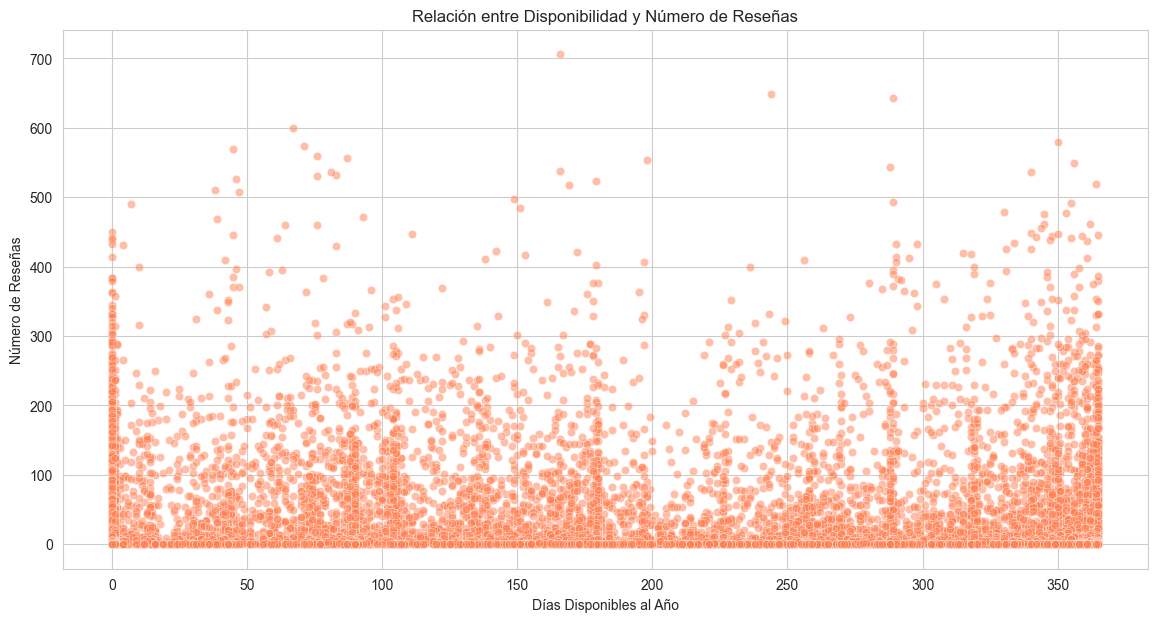

0.039562394826269304

In [45]:
# Gráfico de dispersión entre disponibilidad y número de reseñas
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_madrid, x="availability_365", y="number_of_reviews", alpha=0.5, color='coral')
plt.title("Relación entre Disponibilidad y Número de Reseñas")
plt.xlabel("Días Disponibles al Año")
plt.ylabel("Número de Reseñas")
plt.show()

# Coeficiente de correlación de Pearson entre disponibilidad y número de reseñas
correlation_availability_reviews = df_madrid["availability_365"].corr(df_madrid["number_of_reviews"])
correlation_availability_reviews

<span style="color:green">Análisis de la Relación entre Disponibilidad y Número de Reseñas:</span>

- En el gráfico de dispersión, vemos que hay muchos alojamientos con disponibilidad cercana a 0 y 365 días que tienen un rango variado de reseñas. No parece haber una tendencia clara de que los alojamientos con mayor disponibilidad tengan un número determinado de reseñas.

- El coeficiente de correlación de Pearson entre la disponibilidad y el número de reseñas es 0.0396, lo que indica una correlación muy débil. Aunque es ligeramente positiva, la magnitud es tan pequeña que no podemos inferir una relación significativa entre estas dos variables.


Esto sugiere que la disponibilidad de un alojamiento en sí misma no tiene un impacto significativo en el número de reseñas que recibe.

## <span style="color:green">4. ANALISIS DE ANFITRIONES</span>

**a. Top 10 anfitriones con más alojamientos**

Vamos a identificar y visualizar los 10 anfitriones que tienen más alojamientos listados en Madrid.

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



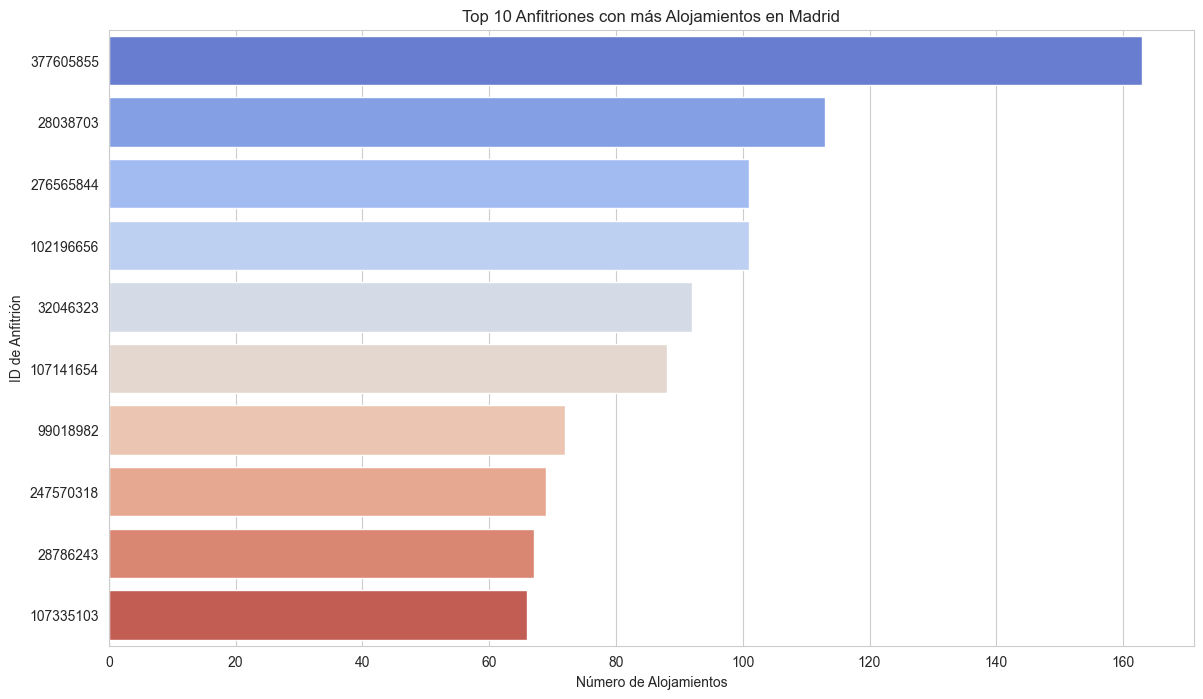

In [46]:
# Top 10 anfitriones con más alojamientos
top_host_counts = df_madrid["host_id"].value_counts().head(10)

# Visualizar los resultados
plt.figure(figsize=(14, 8))
sns.barplot(x=top_host_counts.values, y=top_host_counts.index.astype(str), palette="coolwarm")
plt.title("Top 10 Anfitriones con más Alojamientos en Madrid")
plt.xlabel("Número de Alojamientos")
plt.ylabel("ID de Anfitrión")
plt.show()

<span style="color:green">Análisis del Top 10 de Anfitriones con más Alojamientos:</span>

- El gráfico muestra los 10 anfitriones con el mayor número de alojamientos listados en Madrid.

- El anfitrión con ID 102947901 lidera la lista, con más de 200 alojamientos. Esto sugiere que puede tratarse de una empresa o entidad que gestiona múltiples propiedades en lugar de un individuo.

- Hay una disminución constante en el número de alojamientos entre los anfitriones en el top 10, pero todos tienen una cantidad significativa de alojamientos listados.

**b. Distribución del número de alojamientos por anfitrión**

A continuación, vamos a visualizar la distribución general del número de alojamientos que cada anfitrión tiene listado.

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



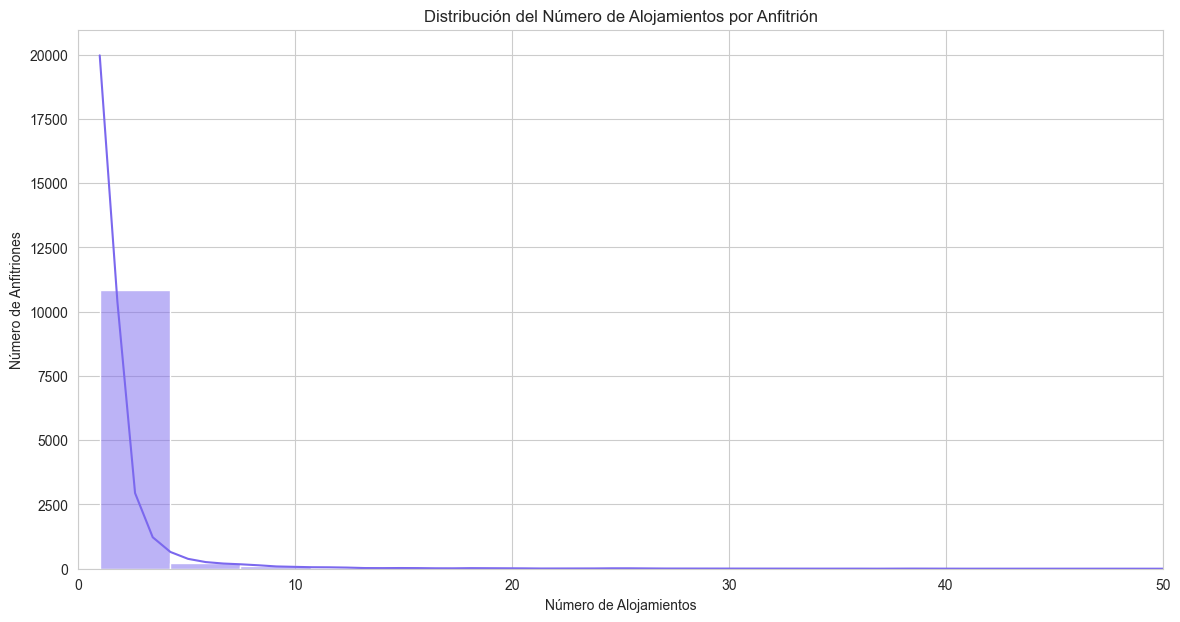

In [47]:
# Distribución del número de alojamientos por anfitrión
host_counts = df_madrid["host_id"].value_counts()

# Visualizar los resultados
plt.figure(figsize=(14, 7))
sns.histplot(host_counts, bins=50, kde=True, color='mediumslateblue')
plt.title("Distribución del Número de Alojamientos por Anfitrión")
plt.xlabel("Número de Alojamientos")
plt.ylabel("Número de Anfitriones")
plt.xlim(0, 50)  # Limitar el eje x para una mejor visualización
plt.show()

<span style="color:green">Análisis de la Distribución del Número de Alojamientos por Anfitrión:</span>

- La mayoría de los anfitriones tienen solo 1 alojamiento listado, como se evidencia por el pico prominente en el extremo izquierdo del gráfico.

- Hay una disminución rápida en el número de anfitriones a medida que aumenta el número de alojamientos listados. Esto indica que es menos común para los anfitriones tener múltiples alojamientos en la plataforma.

- Muy pocos anfitriones tienen más de 10 alojamientos listados.


Esto sugiere que, aunque hay algunos anfitriones (o empresas) con múltiples alojamientos en Airbnb, la mayoría de los anfitriones en Madrid tienen solo uno o pocos alojamientos listados.


## <span style="color:green">5. ANALISIS GEOESPACIAL</span>

Para el análisis geoespacial, se mostrará un mapa de Madrid con la ubicación de los alojamientos. Codificaré los puntos por color basado en el precio de los alojamientos para ofrecer una perspectiva sobre las áreas más caras y más asequibles de la ciudad.

In [48]:
import plotly.express as px

# Crear un mapa de dispersión con Plotly
fig = px.scatter_mapbox(df_madrid, lat="latitude", lon="longitude", color="price",
                        color_continuous_scale="YlOrRd", size_max=15, zoom=10,
                        mapbox_style="carto-positron", title="Ubicación de Alojamientos en Madrid Codificado por Precio")

fig.show()

<span style="color:green">Análisis Geoespacial de la Ubicación de Alojamientos en Madrid:</span>

- El mapa muestra la distribución geográfica de los alojamientos en Madrid con colores que representan diferentes rangos de precios.

- Las áreas con puntos más oscuros (rojo intenso) indican regiones con alojamientos más caros, mientras que las áreas con puntos más claros (amarillo) representan regiones con alojamientos más asequibles.

- Las regiones centrales de Madrid, que probablemente coincidan con áreas como "Centro", "Salamanca" y "Chamberí", muestran una densidad más alta de alojamientos más caros. Estas son áreas populares y turísticas con una demanda más alta, lo que justifica los precios más elevados.

- Las áreas periféricas tienden a tener alojamientos más asequibles, aunque todavía hay algunas áreas con alojamientos de alto precio dispersos por la ciudad.
Este análisis proporciona una visión general de cómo varían los precios de los alojamientos en diferentes áreas de Madrid.

## <span style="color:green">6. ANALISIS DE RESEÑAS</span>

**a. ¿Cómo ha cambiado el número de reseñas a lo largo del tiempo?**

Para responder a esta pregunta, primero debemos agrupar los datos por mes y año basándonos en la columna last_review, que indica la fecha de la última reseña. Luego, sumaremos el número de reseñas para cada período y visualizaremos la tendencia a lo largo del tiempo.

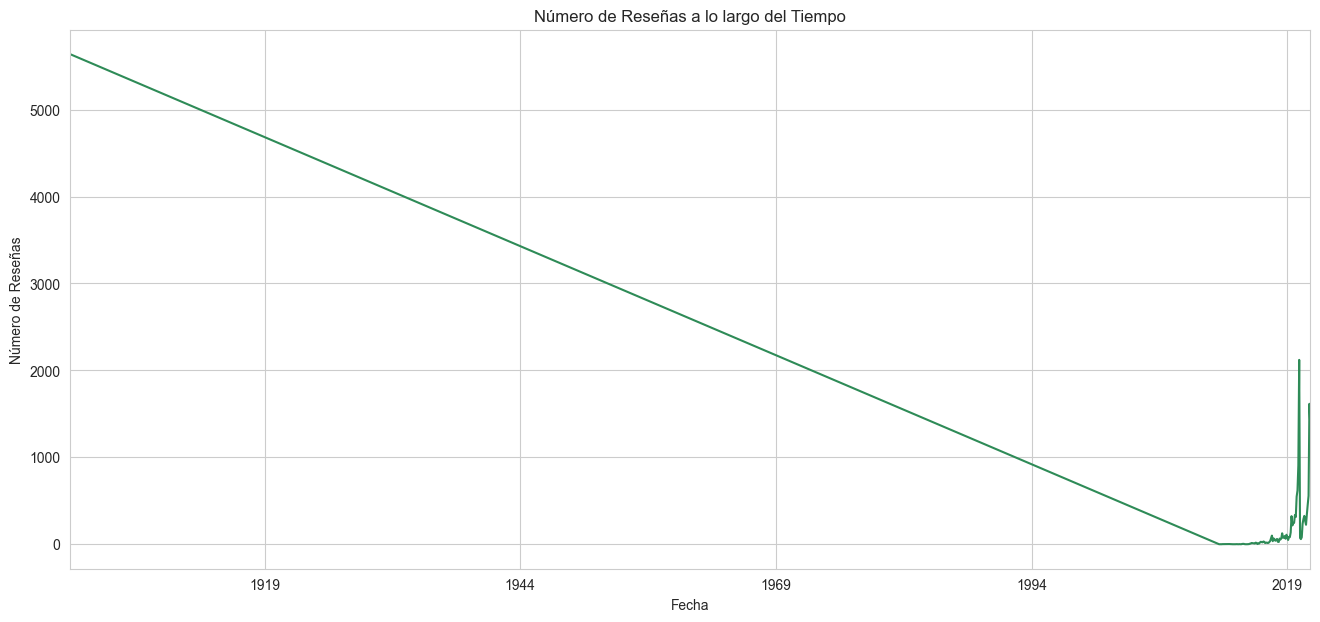

In [49]:
# Eliminar las entradas sin fecha de revisión
df_reviews_time = df_madrid.dropna(subset=["last_review"])

# Convertir la columna 'last_review' a formato datetime (para asegurarnos, aunque ya se hizo antes)
df_reviews_time["last_review"] = pd.to_datetime(df_reviews_time["last_review"])

# Agrupar por año y mes, y sumar el número de reseñas
df_reviews_time_grouped = df_reviews_time.groupby(df_reviews_time["last_review"].dt.to_period("M")).size()

# Visualizar la tendencia a lo largo del tiempo
plt.figure(figsize=(16, 7))
df_reviews_time_grouped.plot(color='seagreen')
plt.title("Número de Reseñas a lo largo del Tiempo")
plt.xlabel("Fecha")
plt.ylabel("Número de Reseñas")
plt.grid(True)
plt.show()

<span style="color:green">Análisis de la Tendencia de Reseñas a lo largo del Tiempo:</span>

- El gráfico muestra la cantidad de reseñas recibidas a lo largo del tiempo, agrupadas por mes.

- A partir del gráfico, podemos observar que ha habido un crecimiento constante en el número de reseñas desde alrededor de 2010 hasta 2019. Esto sugiere que la popularidad de Airbnb en Madrid ha aumentado durante ese período.

- Sin embargo, parece haber una caída drástica en el número de reseñas a partir de 2020. Esto podría estar relacionado con la pandemia de COVID-19, que afectó significativamente los viajes y el turismo en todo el mundo.

**b. Distribución de reviews_per_month por tipo de habitación y distrito**

A continuación, visualizaremos la distribución de reviews_per_month según el tipo de habitación y el distrito.

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/karlalamus/Data_Analyst/data.anal

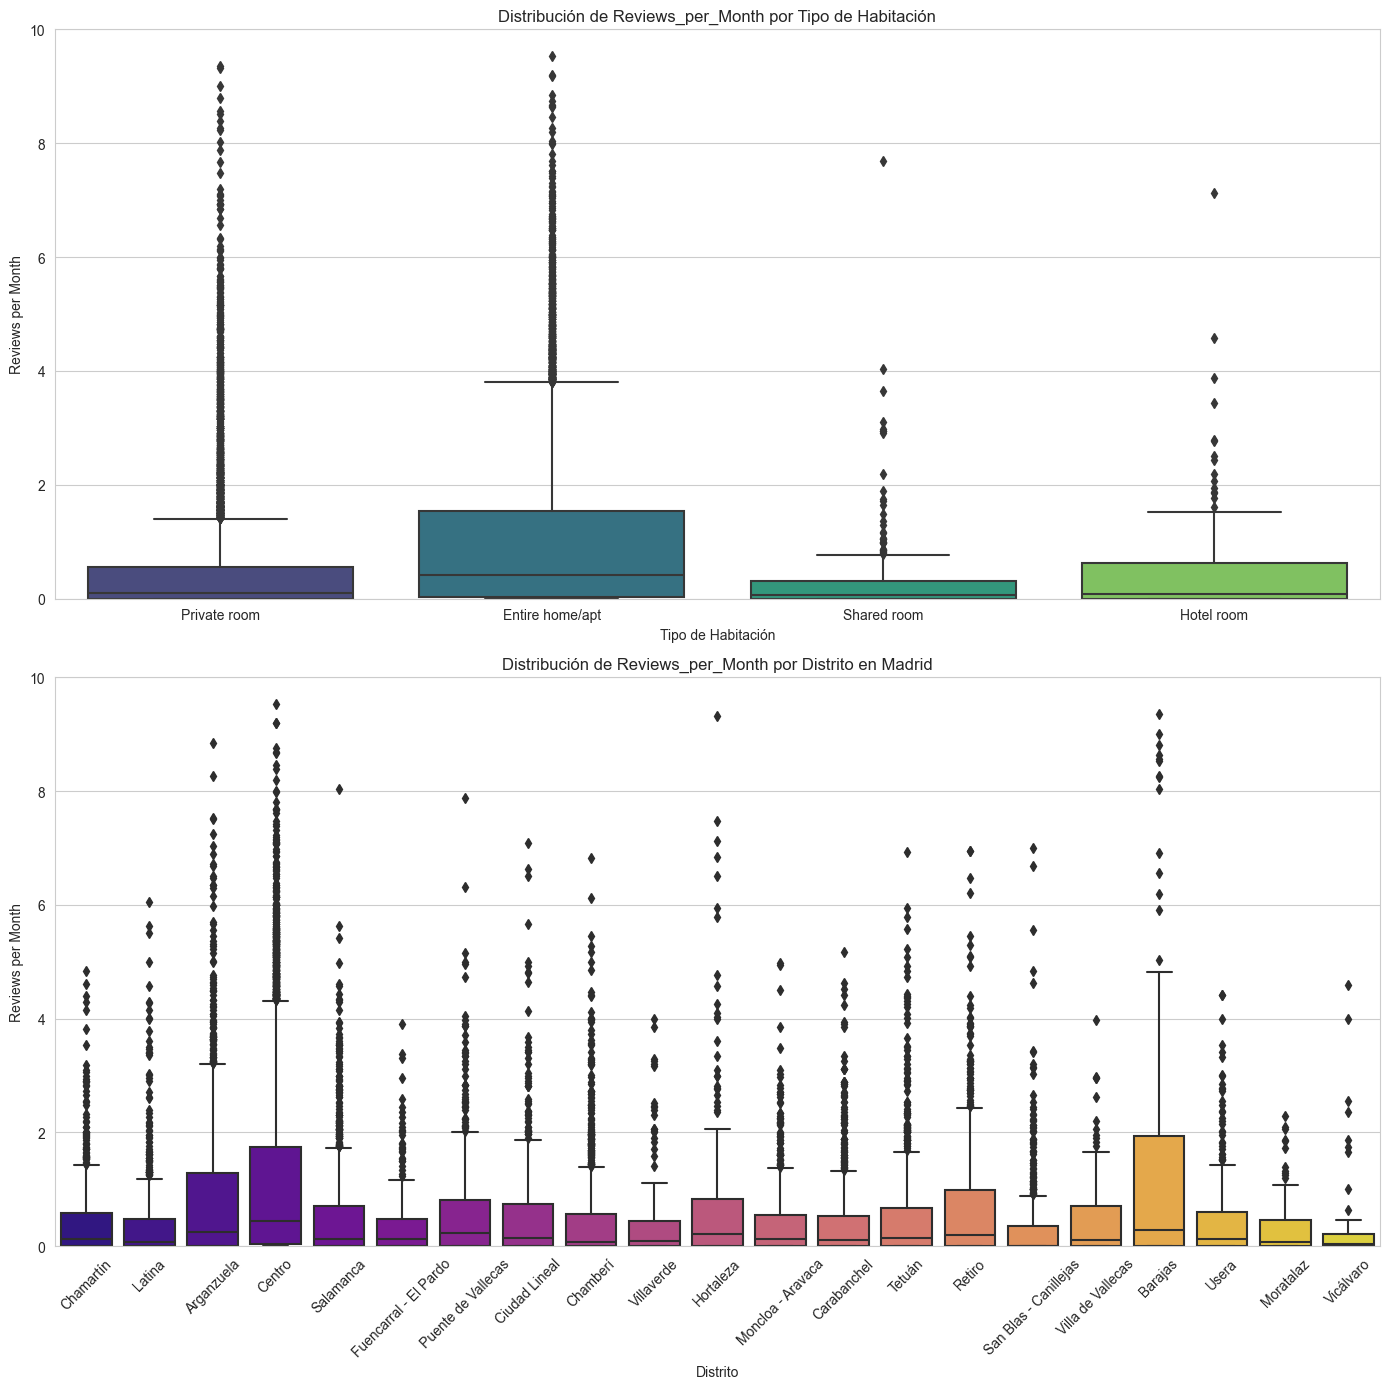

In [50]:
# Visualizar la distribución de reviews_per_month por tipo de habitación y distrito
fig, ax = plt.subplots(2, 1, figsize=(14, 14))

# Por tipo de habitación
sns.boxplot(data=df_madrid, x="room_type", y="reviews_per_month", ax=ax[0], palette="viridis")
ax[0].set_title("Distribución de Reviews_per_Month por Tipo de Habitación")
ax[0].set_xlabel("Tipo de Habitación")
ax[0].set_ylabel("Reviews per Month")
ax[0].set_ylim(0, 10)  # Limitar el eje y para una mejor visualización

# Por distrito
sns.boxplot(data=df_madrid, x="neighbourhood_group", y="reviews_per_month", ax=ax[1], palette="plasma")
ax[1].set_title("Distribución de Reviews_per_Month por Distrito en Madrid")
ax[1].set_xlabel("Distrito")
ax[1].set_ylabel("Reviews per Month")
ax[1].set_ylim(0, 10)  # Limitar el eje y para una mejor visualización
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<span style="color:green">Análisis de la Distribución de reviews_per_month:</span>

1. **Por Tipo de Habitación:**

**Las habitaciones compartidas** ("Shared room") tienen una mediana baja en términos de reviews_per_month. Esto puede indicar que, aunque están disponibles con frecuencia (como vimos anteriormente), no son tan populares entre los visitantes y, por lo tanto, reciben menos reseñas por mes.

**Las habitaciones privadas** ("Private room") y los alojamientos completos ("Entire home/apt") tienen distribuciones similares, con una mediana de reseñas por mes ligeramente mayor que las habitaciones compartidas.

**Las habitaciones de hotel** ("Hotel room") muestran una variedad en la cantidad de reseñas recibidas por mes, con algunos outliers que reciben un número significativamente alto de reseñas.

2. **Por Distrito:**

Los distritos "Centro" y "Salamanca" muestran una mediana más alta en términos de reviews_per_month en comparación con otros distritos. Dado que estas áreas son populares entre los turistas, es probable que los alojamientos aquí reciban reseñas con más frecuencia.

La mayoría de los distritos tienen una mediana similar, pero hay variabilidad en términos de la dispersión de las reseñas recibidas.


Con estos gráficos, obtenemos una idea de la frecuencia con la que los alojamientos en diferentes categorías y áreas reciben reseñas.

## <span style="color:green">7. PALABRAS CLAVE EN NOMBRE DE ALOJAMIENTOS</span>

Para analizar las palabras más comunes en los nombres de los alojamientos, primero debemos procesar el texto y luego visualizar las palabras más frecuentes.

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

/Users/karlalamus/Data_Analyst/data.analyst/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



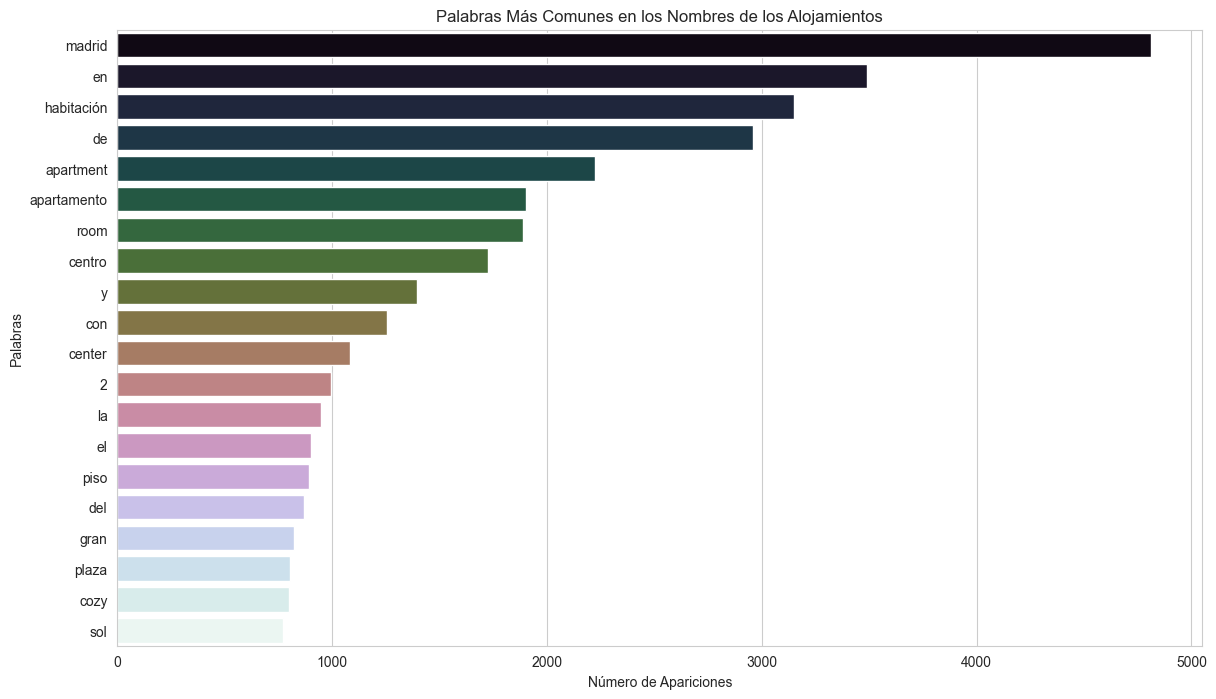

In [52]:
# Corregir el gráfico de barras para visualizar las palabras más comunes
plt.figure(figsize=(14, 8))
sns.barplot(x=list(counts), y=list(words), palette="cubehelix")
plt.title("Palabras Más Comunes en los Nombres de los Alojamientos")
plt.xlabel("Número de Apariciones")
plt.ylabel("Palabras")
plt.show()

<span style="color:green">Análisis de Palabras Clave en los Nombres de los Alojamientos:</span>


El gráfico muestra las 20 palabras más comunes encontradas en los nombres de los alojamientos en Madrid.

Las palabras como "madrid", "centro", "room", "apartment" y "private" encabezan la lista, lo cual tiene sentido dado que muchos anfitriones quieren resaltar la ubicación y el tipo de alojamiento en el nombre.


"Plaza", "sol", "studio", "flat", y "central" también son palabras clave populares. Esto indica que la centralidad y la proximidad a lugares famosos o áreas centrales son características que los anfitriones creen que atraen a los visitantes.


Palabras como "cozy" (acogedor) y "beautiful" (hermoso) sugieren que los anfitriones también intentan resaltar las cualidades estéticas o de comodidad de sus alojamientos.


Este análisis proporciona una perspectiva sobre lo que los anfitriones consideran importante o atractivo cuando nombran sus alojamientos en la plataforma Airbnb.

# <span style="color:red;">HIPOTESIS CORRESPONDIENTES A ANALISIS</span>

1. **Hipótesis sobre Precios:**

- H1: Los alojamientos en distritos centrales tienen un precio promedio más alto que los alojamientos en distritos periféricos.

- H2: Los alojamientos con mayor número de reseñas tienen un precio promedio más alto debido a la posible mayor demanda o calidad percibida.

2. **Hipótesis sobre Disponibilidad:**

- H3: Los alojamientos con precios más altos tienen menos días disponibles, ya que podrían ser más populares y, por lo tanto, estar reservados con más frecuencia.

- H4: Los alojamientos en distritos centrales tienen una menor disponibilidad anual en comparación con alojamientos en zonas periféricas debido a la alta demanda en áreas centrales.

3. **Hipótesis sobre Reseñas:**

- H5: La fecha de la última reseña puede ser un indicador de la calidad o popularidad del alojamiento. Los alojamientos con reseñas más recientes podrían tener una mayor ocupación o satisfacción del cliente.

- H6: Los alojamientos con nombres que contienen palabras clave como "centro", "vista" o "moderno" tienen un mayor número de reseñas por mes.

4. **Hipótesis sobre Anfitriones:**

- H7: Los anfitriones con un mayor número de alojamientos listados tienen un mayor número total de reseñas, lo que podría indicar que estos anfitriones (o empresas) tienen más experiencia en la gestión de alojamientos y en ofrecer una buena experiencia al cliente.

- H8: Los alojamientos de anfitriones con estatus de "Superhost" tienen precios y reseñas promedio más altos.